In [1]:
#importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

In [2]:
#reading data
df = pd.read_csv("newyork.csv")

In [3]:
#printing the top 5 rows of data set
df.head()
#here the coulmn price is our target variable

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#let us see the shape of the dataset
df.shape

(48895, 16)

In [5]:
#the columns in the dataset are
print(df.columns.tolist())

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#from this we could see that there is no missing values in the dataset as the data type for all columns are correct
#now let us check for the null values in the data set

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#we would  drop the columns name,host_name and last_review as they won't help us in predicting the price i.e or target variable
df.drop(["name","host_name","last_review"], axis=1,inplace=True)

In [10]:
#now let us handle reviews_per_month column
df[df["reviews_per_month"].isnull()]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
19,7750,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
26,8700,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
36,11452,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365
38,11943,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [11]:
#we could see that wherever in number_of_reviews the value is zero the reviews_per_month value is null so we would fill null values here with zero

In [12]:
df["reviews_per_month"].fillna(0, inplace=True)

In [13]:
#checking again for null values 
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
# now we have handled the null values in the dataset 
#let us see that how the categorical data is affecting our target

In [15]:
#1. neighbourhood_group
df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [16]:
#from this we could see there are more number of hotels in Manhattan, Brooklyn neighbourhood_group and least in Staten Island neighbourhood_group

In [17]:
df.groupby("neighbourhood_group")["price"].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [18]:
#from this we could see that Manhattan neighbourhood_group have the highest mean price value whereas the Bronx has the lowest 
#and whereas Staten Island neighbourhood_group has lowest number of hotels but the mean price value of it's is quite high

In [19]:
#Now let us check the mean price of various neighbourhood according to it's neighbourhood_group

In [20]:
#2. neighbourhood_group and neighbourhood
ngs = df["neighbourhood_group"].unique()
for ng in ngs:
    print(ng)
    temp = df[df["neighbourhood_group"] == ng]
    
    print(temp.groupby("neighbourhood")["price"].mean().head())
    print("------------------------------------------------")

Brooklyn
neighbourhood
Bath Beach             81.764706
Bay Ridge             144.432624
Bedford-Stuyvesant    107.678244
Bensonhurst            75.786667
Bergen Beach          106.700000
Name: price, dtype: float64
------------------------------------------------
Manhattan
neighbourhood
Battery Park City    367.557143
Chelsea              249.738544
Chinatown            161.497283
Civic Center         191.942308
East Harlem          133.198747
Name: price, dtype: float64
------------------------------------------------
Queens
neighbourhood
Arverne        171.779221
Astoria        117.187778
Bay Terrace    142.000000
Bayside        157.948718
Bayswater       87.470588
Name: price, dtype: float64
------------------------------------------------
Staten Island
neighbourhood
Arden Heights                  67.250000
Arrochar                      115.000000
Bay Terrace, Staten Island    102.500000
Bull's Head                    47.333333
Castleton Corners             139.750000
Name: price, 

In [21]:
# from above analysis we could see that Manhattan neighbourhood_group has the highest mean price and Bronx has the lowest

In [22]:
#3. room_type
df.groupby("room_type")["price"].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

In [23]:
#it is clear that room_type having Entire home/ apt is having quite high mean price value whereas shared is having low

In [24]:
# Now let us see how our numerical data affects our target

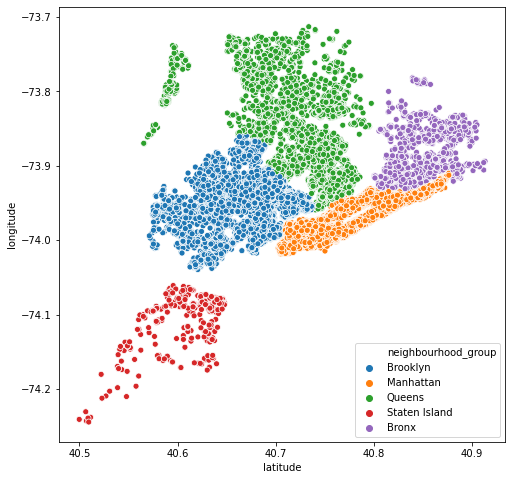

In [25]:
# they won't help us to predict the target but would help us to geographically locate the hotels according to neighbourhood_groups
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x="latitude", y="longitude", hue="neighbourhood_group")
plt.show()

In [26]:
#as we could see there are less hotels in Staten Island and more in Brooklyn and Manhattan

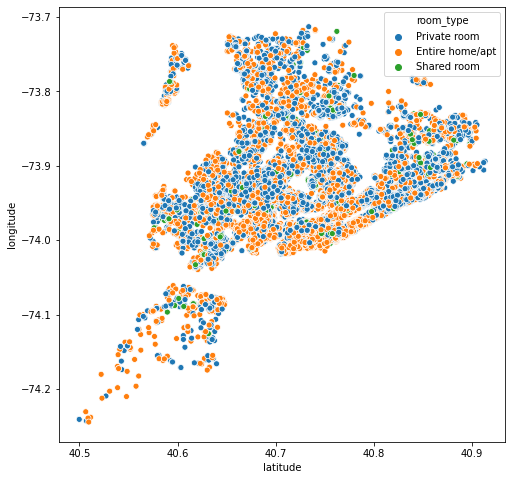

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x="latitude", y="longitude", hue="room_type")
plt.show()

In [28]:
# from above graph we could see that there are more Entire apartment in Staten Island

In [29]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [30]:
# here we could see that price value has minimum value as 0.00 which is not possible let us handle that

In [31]:
df = df[df["price"] > 0]

df = df[df["availability_365"] > 0]

In [32]:
df_num = df.select_dtypes(["int64","float64"])

In [33]:
df_num.drop(["id","host_id","calculated_host_listings_count"], axis=1, inplace=True)
#as the coulmns id, host_id calculated_host_listings_count won't help us to predict the target variable we would drop them

c:\users\omkar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
df_num.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,40.64749,-73.97237,149,1,9,0.21,365
1,40.75362,-73.98377,225,1,45,0.38,355
2,40.80902,-73.94190,150,3,0,0.00,365
3,40.68514,-73.95976,89,1,270,4.64,194
5,40.74767,-73.97500,200,3,74,0.59,129


In [35]:
# let us see how the df_num coulmns are distributed

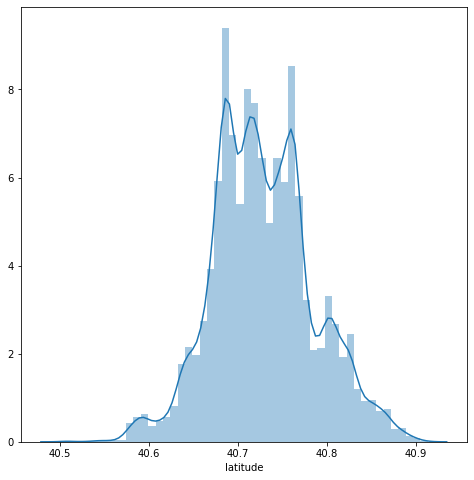

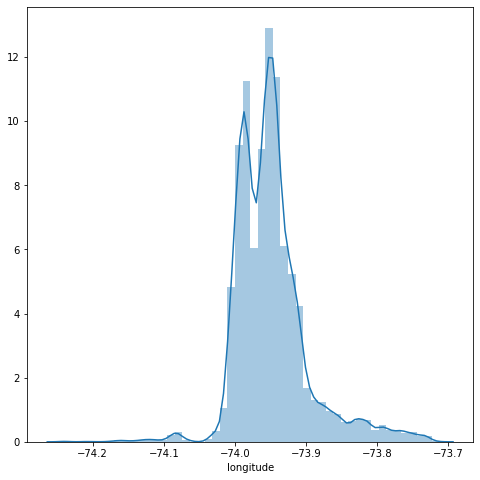

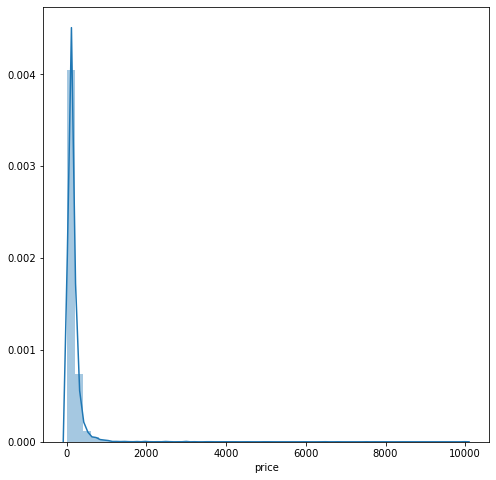

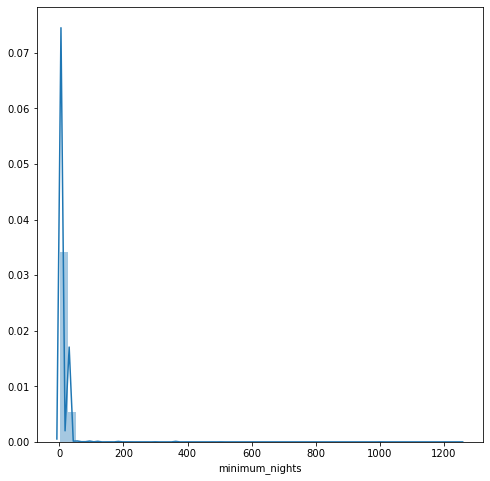

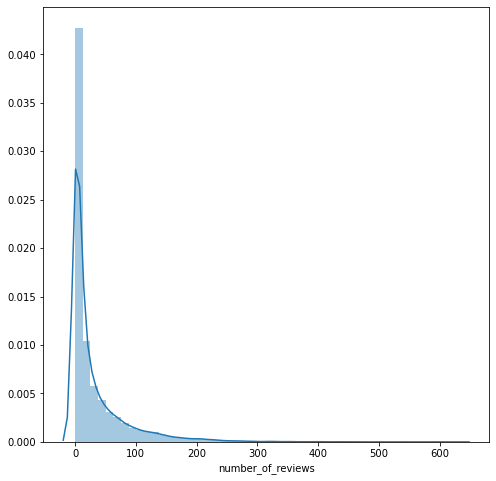

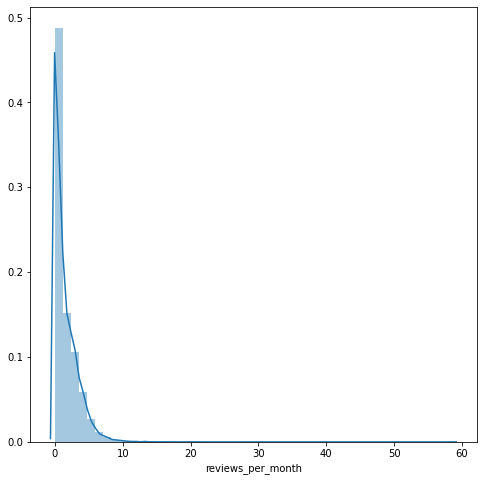

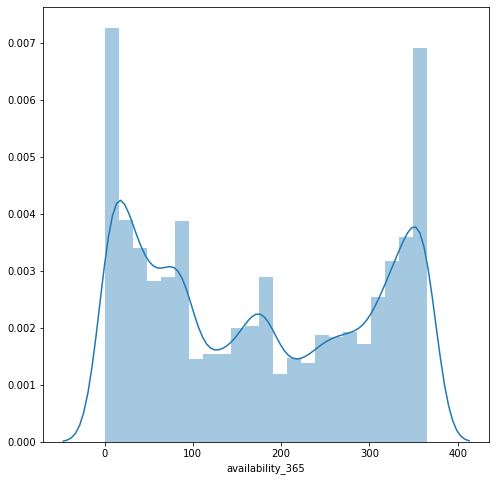

In [36]:
for col in df_num:
    plt.figure(figsize=(8,8))
    sns.distplot(df_num[col])
    plt.show()

In [37]:
#here the price,minimun_nights,number_of_reviews,reviews_per_month are positively skewwed

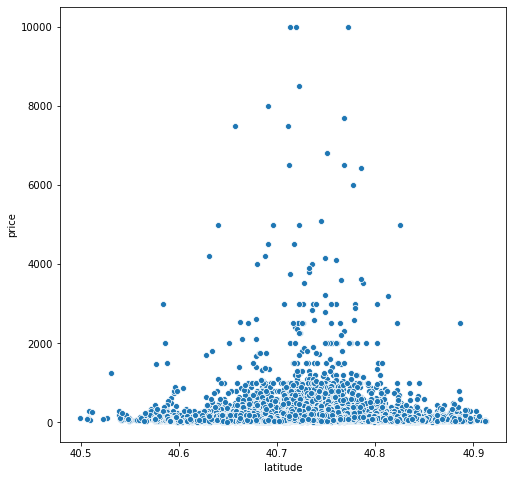

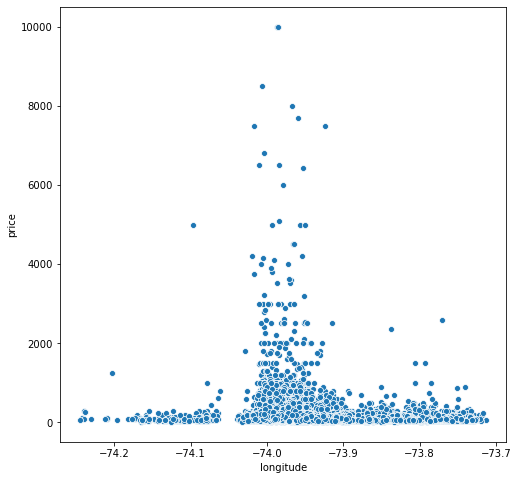

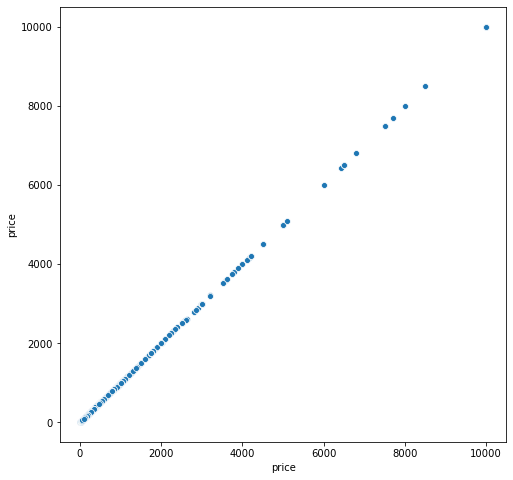

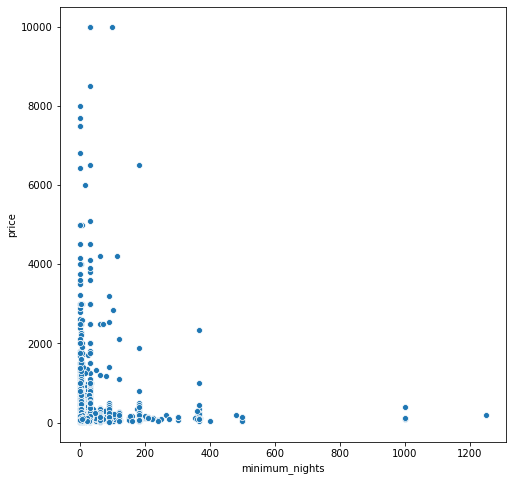

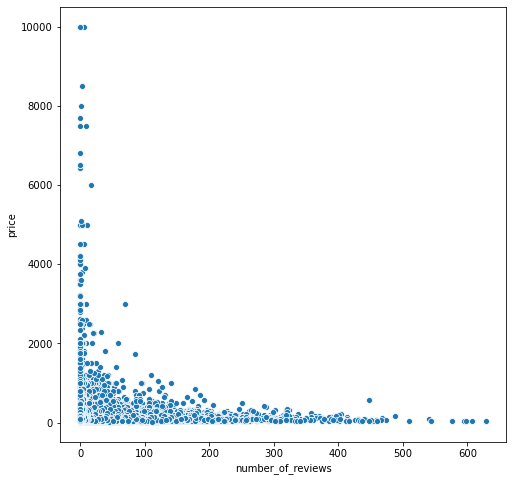

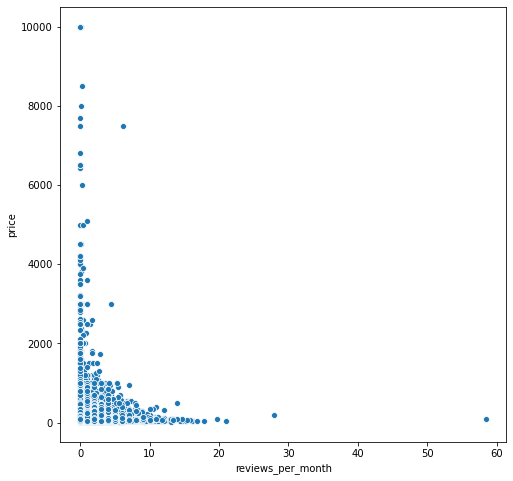

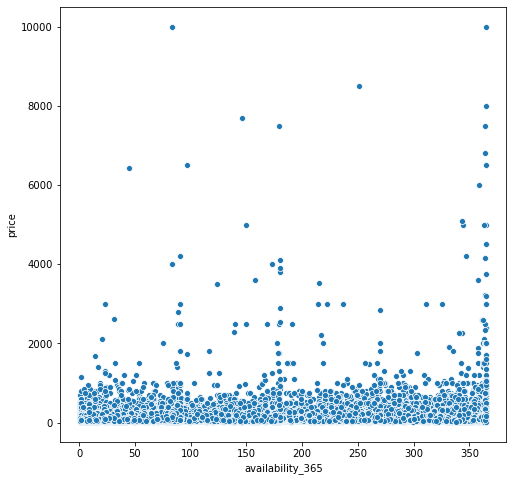

In [38]:
#let us plot scatter plot against price to see if there is any correlation between them
for col in df_num:
    plt.figure(figsize=(8,8))
    sns.scatterplot(data=df_num ,x=col, y="price")
    plt.show()

In [39]:
# as from the scatter plots we could see that all the coulmns are not correlated with our target variable

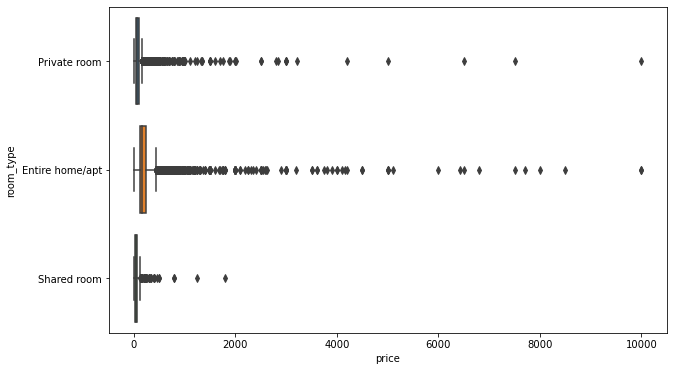

In [40]:
# let us see for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="price", y="room_type")
plt.show()

In [41]:
# we could see that majority of data are itself the outliers so we won't delete them

In [42]:
# let us separate the price data 
pd.Series(pd.cut(df_num["price"],50)).value_counts(sort=False)

(0.01, 209.8]        25325
(209.8, 409.6]        4645
(409.6, 609.4]         768
(609.4, 809.2]         299
(809.2, 1009.0]        146
(1009.0, 1208.8]        33
(1208.8, 1408.6]        17
(1408.6, 1608.4]        22
(1608.4, 1808.2]        12
(1808.2, 2008.0]        17
(2008.0, 2207.8]         4
(2207.8, 2407.6]         5
(2407.6, 2607.4]        12
(2607.4, 2807.2]         2
(2807.2, 3007.0]        12
(3007.0, 3206.8]         1
(3206.8, 3406.6]         1
(3406.6, 3606.4]         3
(3606.4, 3806.2]         3
(3806.2, 4006.0]         3
(4006.0, 4205.8]         4
(4205.8, 4405.6]         0
(4405.6, 4605.4]         2
(4605.4, 4805.2]         0
(4805.2, 5005.0]         4
(5005.0, 5204.8]         1
(5204.8, 5404.6]         0
(5404.6, 5604.4]         0
(5604.4, 5804.2]         0
(5804.2, 6004.0]         1
(6004.0, 6203.8]         0
(6203.8, 6403.6]         0
(6403.6, 6603.4]         3
(6603.4, 6803.2]         1
(6803.2, 7003.0]         0
(7003.0, 7202.8]         0
(7202.8, 7402.6]         0
(

In [43]:
# we could see that the price value is most in the range 0.01, 209.8 and least in 9800.2, 10000.0

In [44]:
# as linear regression won't be possible as the data is neither normally distributed nor any any correlation exists between them
#so now we would change our price column as a categorical data and would further perform various classification algorithms on them

In [45]:
# defining the method to convert price into  3 categories
def price_to_cat(x):
    if x <= 200:
        return "0-200"
    elif x<= 1000:
        return "200-1000"
    else:
        return "1000>"

In [46]:
df["price_cat"] = df["price"].map(price_to_cat) 
#calling the method price_to_cat()

In [47]:
df["price_cat"].value_counts()
#as we could see that the price is categorized in 3 parts as follows

0-200       25185
200-1000     5997
1000>         172
Name: price_cat, dtype: int64

In [48]:
df_cat = df.select_dtypes(["object"])
# selecting the object datatypes

In [49]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

c:\users\omkar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type,price_cat
0,1,107,1,0
1,2,126,0,2
2,2,93,1,0
3,1,40,0,0
5,2,136,0,0


In [51]:
#selecting only numerical data
df_new = pd.concat([df_num,df_cat], axis=1)

In [52]:
#dropping the price column as we already have categorical column for price
df_new.drop("price", axis=1, inplace=True)

In [53]:
#Creating model
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [54]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [55]:
#let us start with DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
from sklearn.metrics import classification_report

In [59]:
y_pred = dt.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7565
           1       0.08      0.11      0.10        35
           2       0.48      0.49      0.48      1807

    accuracy                           0.80      9407
   macro avg       0.48      0.49      0.48      9407
weighted avg       0.80      0.80      0.80      9407



In [61]:
#from the above classification report we could see that 
#category 0 is having quite good score
#category 2 is having fine score
#whereas category 1 is having the least score

In [63]:
# now we should try some resampling techniques as the y_pred column counts have imbalance data

In [64]:
#oversampling

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
ros=RandomOverSampler(random_state=1)

In [69]:
X_sample,y_sample=ros.fit_sample(X_train,y_train)

In [70]:
pd.Series(y_sample).value_counts()

2    17620
1    17620
0    17620
Name: price_cat, dtype: int64

In [71]:
dt1 = DecisionTreeClassifier()

In [72]:
dt1.fit(X_sample,y_sample)

DecisionTreeClassifier()

In [73]:
y_pred1=dt1.predict(X_test)

In [74]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7565
           1       0.11      0.17      0.13        35
           2       0.49      0.48      0.48      1807

    accuracy                           0.80      9407
   macro avg       0.49      0.51      0.50      9407
weighted avg       0.80      0.80      0.80      9407



In [ ]:
# from the over sampling classification report we could see that the 
#for category 0 the precision and recall are same
#for category 1 the precision and recall is quite improved but overall not good report
#for category 2 the precision and recall is same as the previous one

In [75]:
#under sampling

In [77]:
from imblearn.under_sampling import RandomUnderSampler

In [78]:
rus=RandomUnderSampler(random_state=1)

In [79]:
X_sample1,y_sample1=rus.fit_sample(X_train,y_train)

In [82]:
pd.Series(y_sample1).value_counts()

2    137
1    137
0    137
Name: price_cat, dtype: int64

In [83]:
dt2 = DecisionTreeClassifier()

In [85]:
dt2.fit(X_sample1,y_sample1)

DecisionTreeClassifier()

In [87]:
y_pred2=dt2.predict(X_test)

In [88]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      7565
           1       0.02      0.83      0.03        35
           2       0.33      0.52      0.40      1807

    accuracy                           0.57      9407
   macro avg       0.42      0.64      0.38      9407
weighted avg       0.81      0.57      0.65      9407



In [89]:
#from the under sampling classification report we could see that
#category 0 is having good score
#category 1 precision is bad but recall is quite good
#category 2 is having average score

In [90]:
#from the above reports we could see that the under sampling is giving overall good score so we would go with that model

In [92]:
y_pred1.tolist()
#predicted price according to category

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
